In [54]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd

start=dt.datetime(2010,1,1)
end=dt.datetime.now()

tickers=['AAPL','MSFT','GOOG','F','MS']

df=pd.DataFrame()
for ticker in tickers:
    df2=web.DataReader(ticker,'yahoo',start,end)
    df[ticker]=df2['Adj Close']

In [57]:
import numpy as np
return1=np.log(df/df.shift(1))

In [61]:
return1.dropna(inplace=True)

In [70]:
Er=np.array(return1.describe().loc['mean'])
std=np.array(return1.describe().loc['std'])
var=std**2
varcovar1=return1.cov()

In [92]:
# Efficient Portfolio A

c1=0

weightA=np.linalg.inv(varcovar1) @ (Er-c1) / np.sum(np.linalg.inv(varcovar1) @ (Er-c1))
ErA=weightA@Er
VarA=weightA@varcovar1@weightA.T
stdA=np.sqrt(VarA)

In [93]:
# Efficient Portfolio B

c2=0.04

weightB=np.linalg.inv(varcovar1) @ (Er-c2) / np.sum(np.linalg.inv(varcovar1) @ (Er-c2))
ErB=weightB@Er
VarB=weightB@varcovar1@weightB.T
stdB=np.sqrt(VarB)

In [86]:
covAB=weightA@varcovar1@weightB.T

In [97]:
wa=np.linspace(-1.5,4.5,num=100)
wb=1-wa

In [98]:
ErC=wa*ErA + wb*ErB

In [99]:
stdC=np.sqrt((wa*stdA)**2 + (wb*stdB)**2 + 2*wa*wb*covAB)

In [108]:
UM=np.ones((varcovar1.shape[0]))

GMVP=UM @ np.linalg.inv(varcovar1) / (UM @ np.linalg.inv(varcovar1) @ UM.T)

In [112]:
GMVP
ErG=GMVP@Er
stdG=np.sqrt(GMVP@varcovar1@GMVP.T)

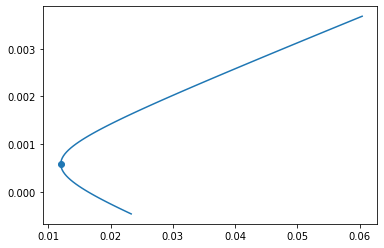

In [113]:
import matplotlib.pyplot as plt

plt.plot(stdC,ErC)
plt.scatter(stdG,ErG)
plt.show()